In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('/Diwali Sales Data_PYTHON.csv', encoding = 'unicode_escape')

In [ ]:
df.shape


(11251, 15)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# **Data** **Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop(['Status','unnamed1'] , axis=1, inplace=True )
#to delete last 2 columns

In [ ]:
pd.isnull(df).sum()
#to check null values

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
#to drop null values
df.dropna(inplace=True)

In [ ]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
df['Amount']=df['Amount'].astype('int')


In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df.rename(columns= {'User_ID' :'UID'}, inplace=True)

In [ ]:
df.columns

Index(['UID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df.describe()

,UID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# **Exploratory Data Analysis**

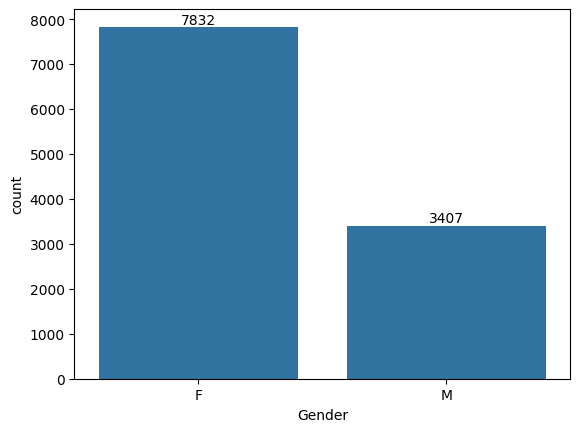

In [ ]:
ax=sns.countplot(x='Gender',data=df)

for bar in ax.containers:
  ax.bar_label(bar)

<Axes: xlabel='Gender', ylabel='Amount'>

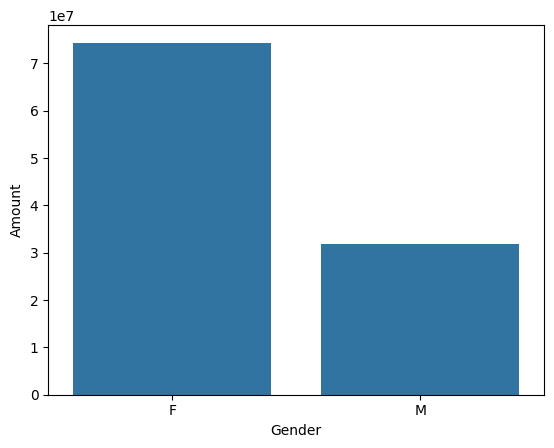

In [ ]:
val=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Gender' , y='Amount', data = val)

From above graph we conclude that most of the buyers are female and purchasing power of female is greater


**AGE**

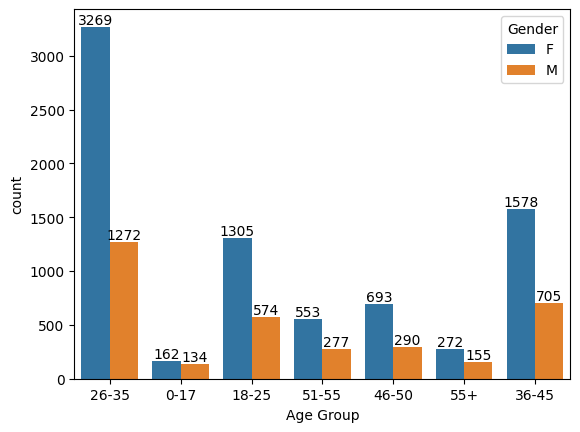

In [ ]:
ax=sns.countplot(data=df , x='Age Group', hue='Gender')

for bar in ax.containers:
    ax.bar_label(bar)

Total Amount vs Age grp

<Axes: xlabel='Age Group', ylabel='Amount'>

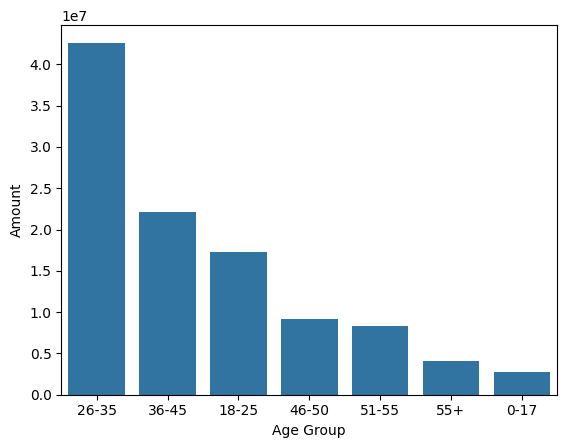

In [12]:
sales_Grp= df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)

sns.barplot (x='Age Group', y='Amount' , data= sales_Grp)

From above chart we can see most of the buyers are of age group between 26-35 and are mostly females.

### **States**

<Axes: xlabel='State', ylabel='Orders'>

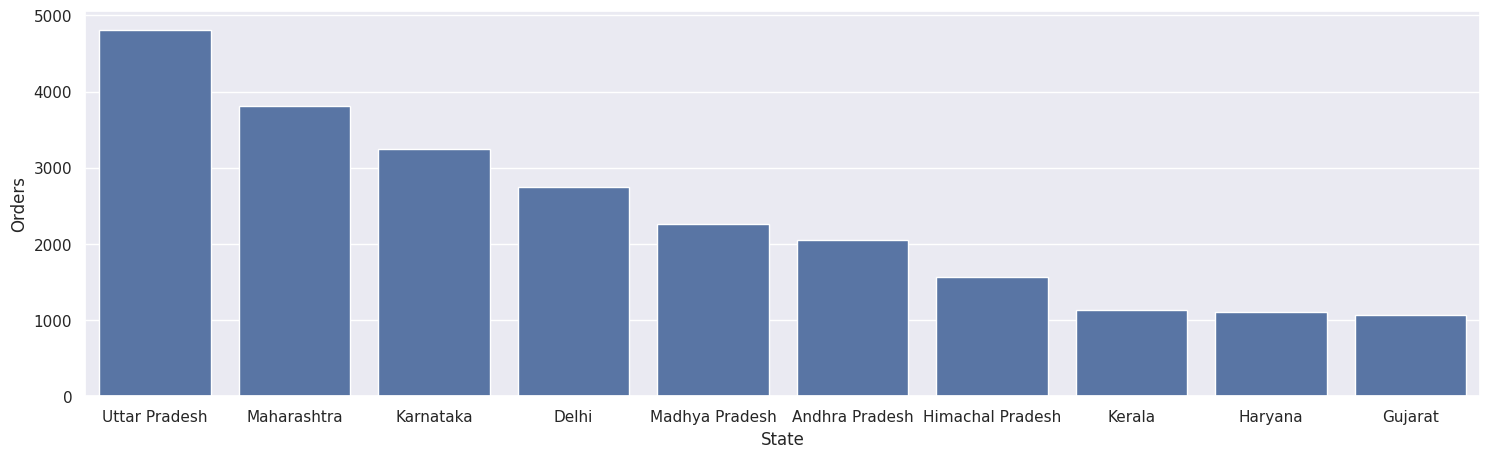

In [19]:
#total orders from top 10 states

states_sales= df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})

sns.barplot(x='State',y='Orders',data= states_sales)

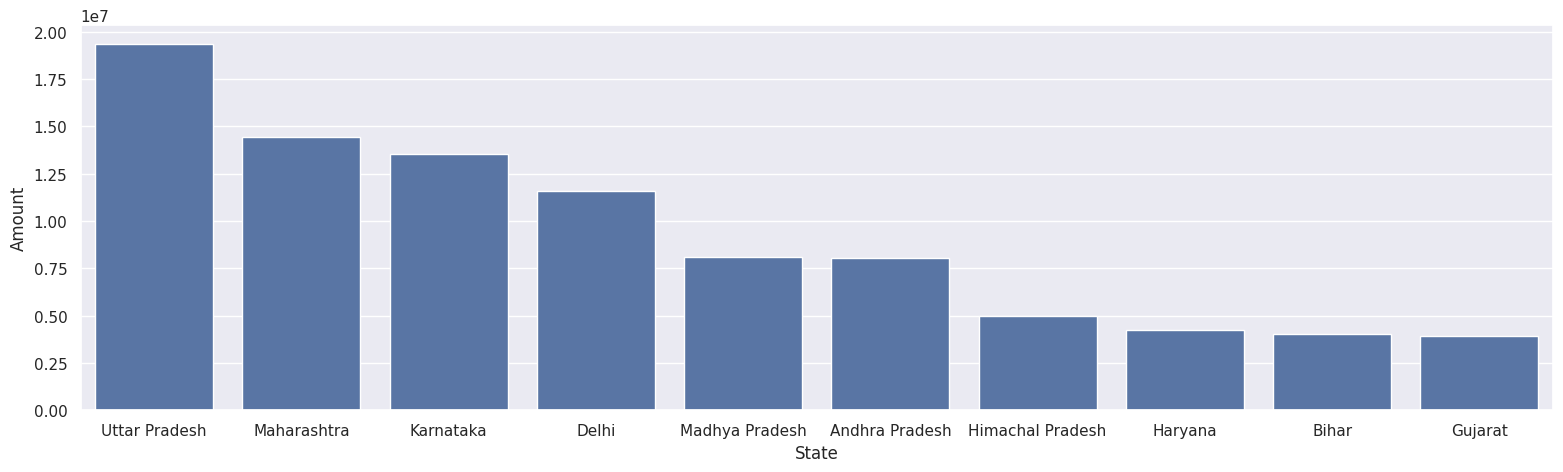

In [25]:
# total amount vs sales from top 10 states

sls=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)

sns.set(rc={'figure.figsize':(19,5)})

sas=sns.barplot(x='State', y='Amount', data=sls)

# for bar in sas.containers:
#     sas.bar_label(bar)


From the above graph we can see that most of the orders and sales amounts are from Gujrat,Maharastra,Karnataka.

### **Marital** **Status**

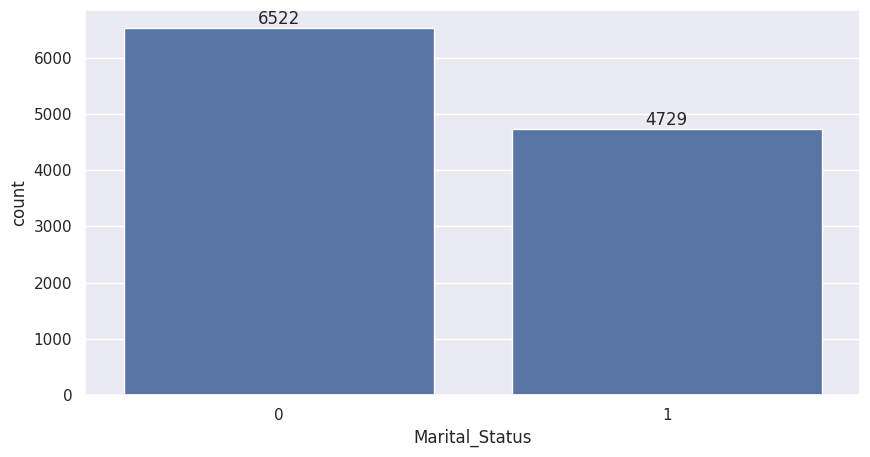

In [29]:
ax=sns.countplot(data=df,x='Marital_Status')

sns.set(rc={'figure.figsize':(5,5)})
for bar in ax.containers:
  ax.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

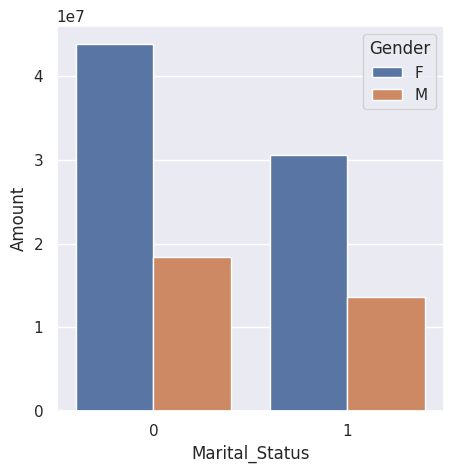

In [36]:
 sls= df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Marital_Status',y='Amount',data=sls, hue='Gender')

From above graph it can be seen married women purchased the most and has maximum purchasing parity

### **Occupation**

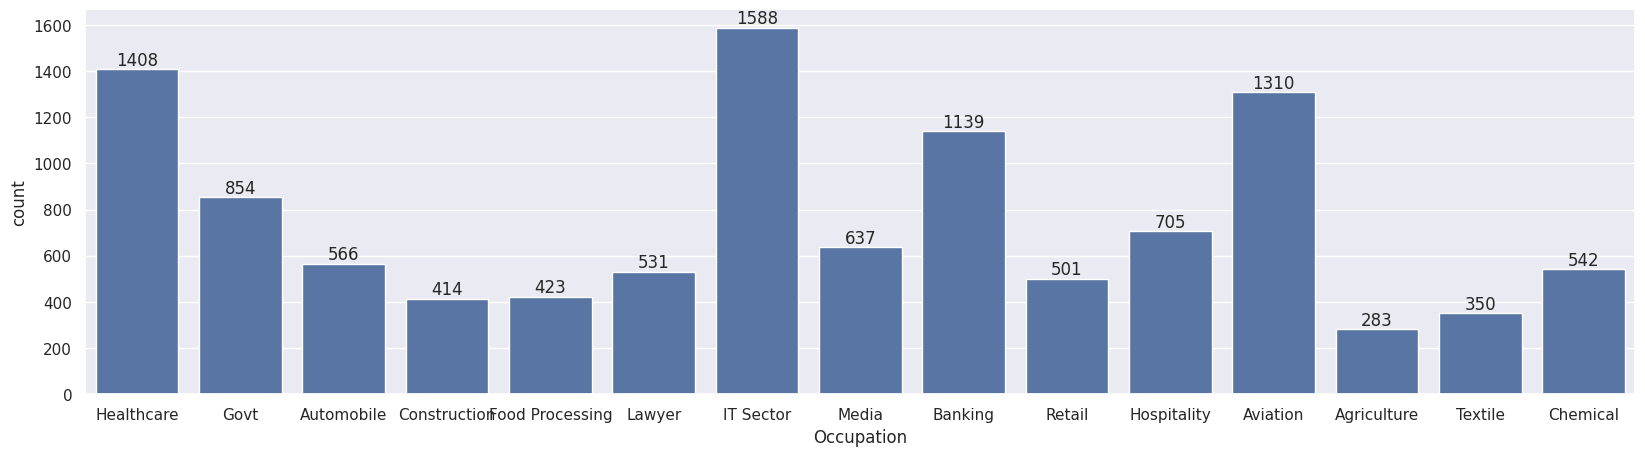

In [41]:
occ=sns.countplot(x='Occupation',data=df)
sns.set(rc={'figure.figsize':(30,5)})

for bar in occ.containers:
  occ.bar_label(bar)

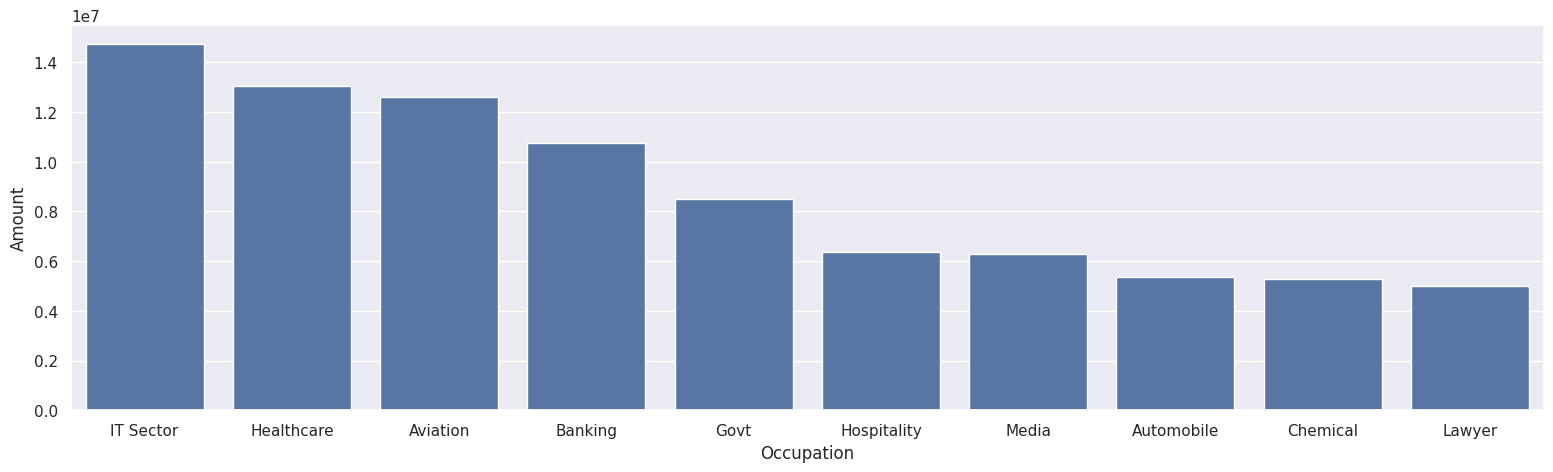

In [42]:
sls=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)

sns.set(rc={'figure.figsize':(19,5)})

sas=sns.barplot(x='Occupation', y='Amount', data=sls)

From above graph it can be concluded that IT Sector, HealthCare and aviation has highest purchasing power.

### **Product** **Category**

In [43]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

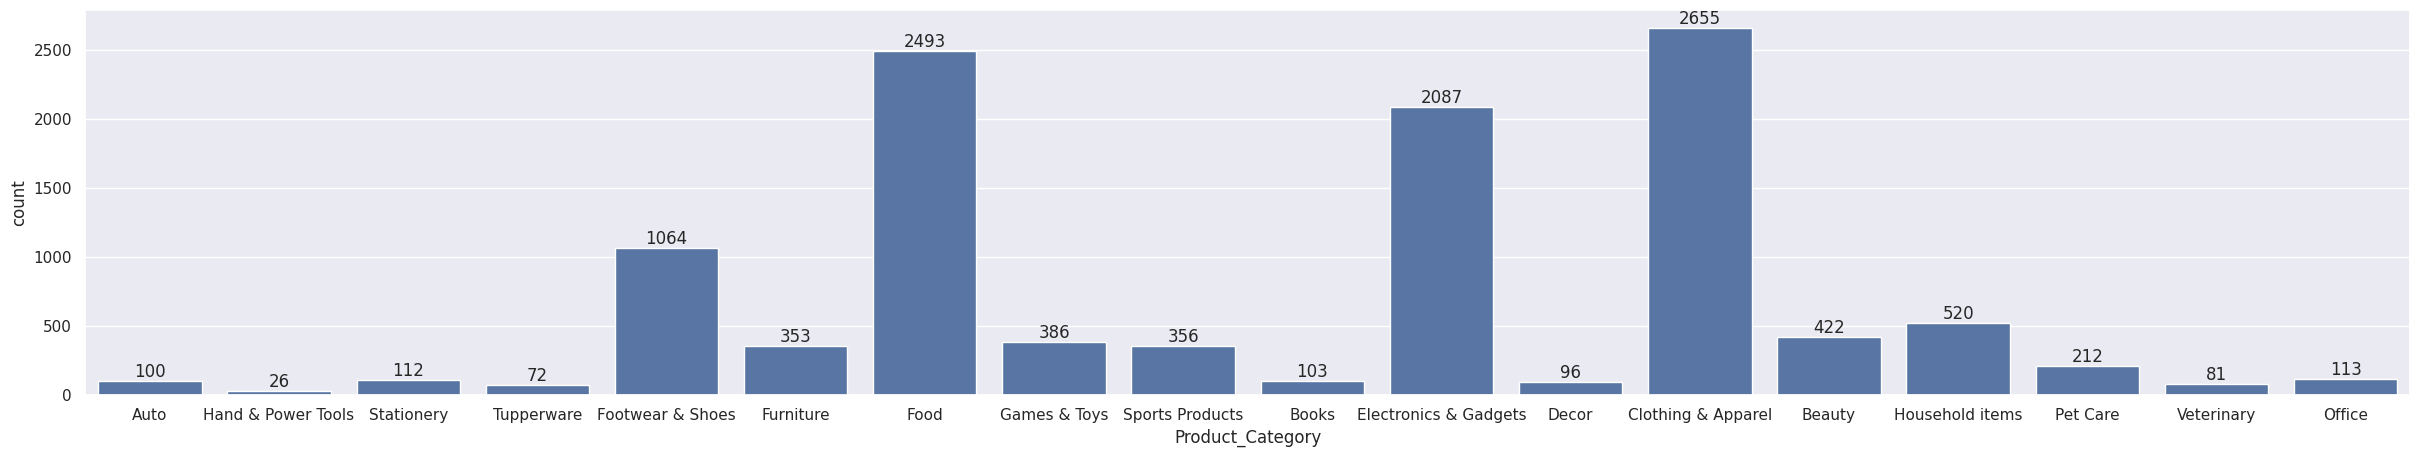

In [48]:
pc=sns.countplot(x='Product_Category',data=df)

sns.set(rc={'figure.figsize':(50,5)})
for bar in pc.containers:
  pc.bar_label(bar)

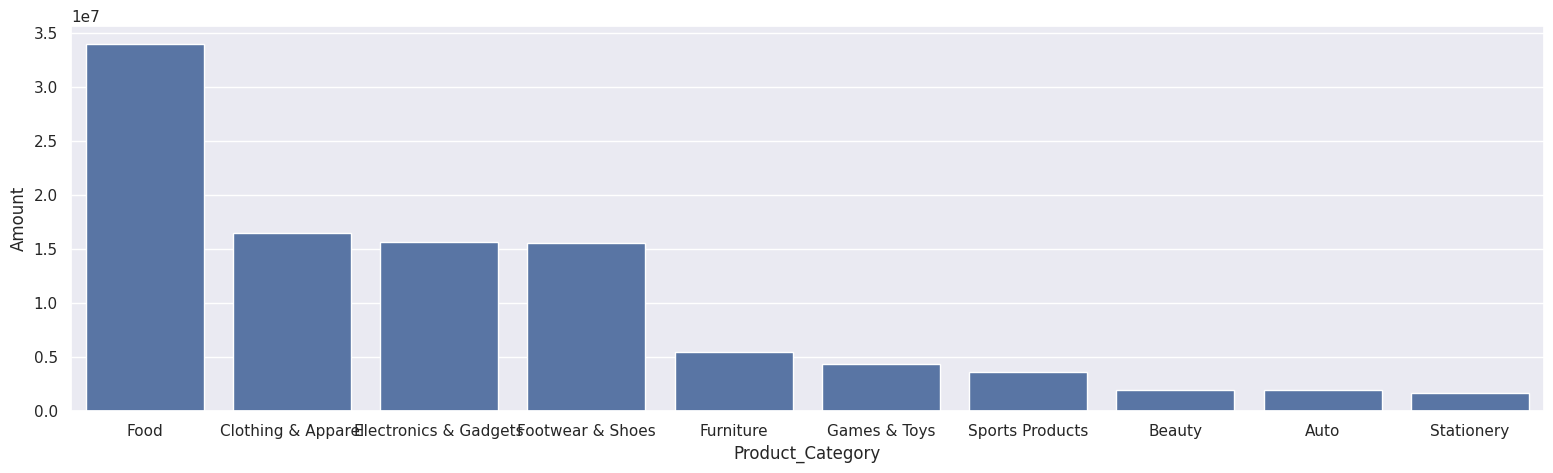

In [49]:
sls=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)

sns.set(rc={'figure.figsize':(19,5)})

sas=sns.barplot(x='Product_Category', y='Amount', data=sls)

It can be concluded that most sold products are from food, clothings and Electronic category

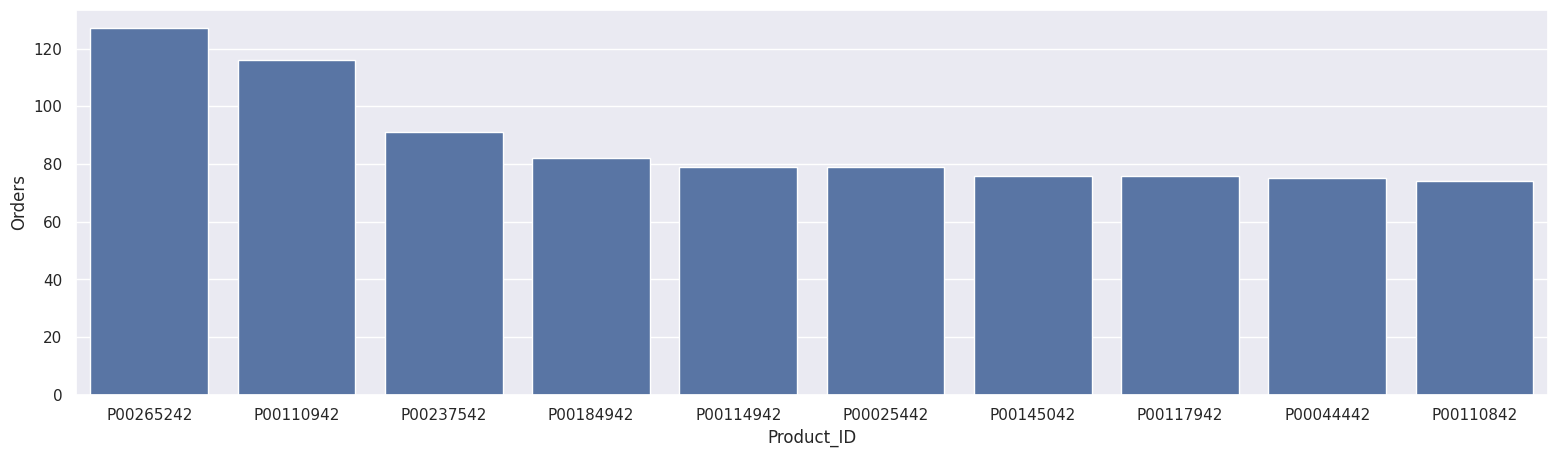

In [50]:
sls=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(19,5)})

sas=sns.barplot(x='Product_ID', y='Orders', data=sls)


# **CONCLUSION**

## **Married Women** age **26-35** living in **UP, Maharastra and Karnataka** working in **IT, Aviation and HealthCare** bought most products among all from **Clothing, Electronics and Food category**.